# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

#test_cities = cities[0:100]
#test_cities = cities.copy()
#print(test_cities)

624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
i = 1
for city in cities:
        
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": units,
    }
    
    weather_response = requests.get(url, params).json()
    
    #pprint(weather_response)
    
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        
    i += 1
        

Processing Record 1 of 624 | bay roberts
Processing Record 2 of 624 | laguna
Processing Record 3 of 624 | hambantota
Processing Record 4 of 624 | narsaq
Processing Record 5 of 624 | castro
Processing Record 6 of 624 | nikolskoye
Processing Record 7 of 624 | hermanus
Processing Record 8 of 624 | mar del plata
Processing Record 9 of 624 | butaritari
Processing Record 10 of 624 | axim
Processing Record 11 of 624 | mukhen
Processing Record 12 of 624 | lompoc
Processing Record 13 of 624 | karaton
Processing Record 14 of 624 | irinjalakuda
Processing Record 15 of 624 | sawtell
Processing Record 16 of 624 | albany
Processing Record 17 of 624 | puerto ayora
Processing Record 18 of 624 | mataura
Processing Record 19 of 624 | zlobin
Processing Record 20 of 624 | kavaratti
Processing Record 21 of 624 | georgetown
Processing Record 22 of 624 | vaini
Processing Record 23 of 624 | thompson
Processing Record 24 of 624 | patitirion
Processing Record 25 of 624 | nacozari
Processing Record 26 of 624 | b

Processing Record 201 of 624 | boden
Processing Record 202 of 624 | christchurch
Processing Record 203 of 624 | guiglo
Processing Record 204 of 624 | qaanaaq
Processing Record 205 of 624 | plettenberg bay
Processing Record 206 of 624 | mitha tiwana
Processing Record 207 of 624 | port elizabeth
Processing Record 208 of 624 | katsuura
Processing Record 209 of 624 | tommot
Processing Record 210 of 624 | kloulklubed
Processing Record 211 of 624 | sao joao del rei
Processing Record 212 of 624 | berlevag
Processing Record 213 of 624 | esmeraldas
Processing Record 214 of 624 | murgab
Skipping grand river south east as field or result was not present (215)
Processing Record 216 of 624 | saquarema
Processing Record 217 of 624 | east london
Processing Record 218 of 624 | singaparna
Processing Record 219 of 624 | necochea
Processing Record 220 of 624 | krasnoarmeysk
Skipping palabuhanratu as field or result was not present (221)
Processing Record 222 of 624 | tolaga bay
Processing Record 223 of 6

Processing Record 395 of 624 | goundam
Processing Record 396 of 624 | alzamay
Processing Record 397 of 624 | waingapu
Processing Record 398 of 624 | erzin
Processing Record 399 of 624 | senanga
Processing Record 400 of 624 | san juan
Processing Record 401 of 624 | maningrida
Processing Record 402 of 624 | nuuk
Skipping sorvag as field or result was not present (403)
Processing Record 404 of 624 | horodnytsya
Processing Record 405 of 624 | slave lake
Processing Record 406 of 624 | shimoda
Processing Record 407 of 624 | gornopravdinsk
Skipping rungata as field or result was not present (408)
Processing Record 409 of 624 | santa cruz
Processing Record 410 of 624 | barranca
Processing Record 411 of 624 | sindou
Processing Record 412 of 624 | dondo
Processing Record 413 of 624 | aktash
Processing Record 414 of 624 | meulaboh
Processing Record 415 of 624 | flin flon
Processing Record 416 of 624 | kapit
Processing Record 417 of 624 | bodo
Processing Record 418 of 624 | bethel
Processing Recor

Processing Record 593 of 624 | hurricane
Processing Record 594 of 624 | minyar
Processing Record 595 of 624 | mabaruma
Processing Record 596 of 624 | boyolangu
Processing Record 597 of 624 | linqu
Processing Record 598 of 624 | regina
Processing Record 599 of 624 | orange walk
Processing Record 600 of 624 | saint-pierre
Processing Record 601 of 624 | sistranda
Processing Record 602 of 624 | singkang
Processing Record 603 of 624 | makasar
Processing Record 604 of 624 | teeli
Processing Record 605 of 624 | acajutla
Processing Record 606 of 624 | yanam
Processing Record 607 of 624 | mutis
Processing Record 608 of 624 | izyum
Processing Record 609 of 624 | kolkwitz
Processing Record 610 of 624 | abalak
Processing Record 611 of 624 | palmer
Processing Record 612 of 624 | mayna
Processing Record 613 of 624 | tautira
Processing Record 614 of 624 | skovorodino
Skipping yomitan as field or result was not present (615)
Processing Record 616 of 624 | anloga
Processing Record 617 of 624 | paamiut


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Redorder the columns
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]

In [5]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bay roberts,47.60,-53.26,37.40,100,90,8.05,CA,1603862103
1,laguna,38.42,-121.42,57.00,58,1,3.36,US,1603861947
2,hambantota,6.12,81.12,84.87,67,94,6.73,LK,1603861997
3,narsaq,60.92,-46.05,30.20,80,75,1.12,GL,1603862104
4,castro,-24.79,-50.01,55.54,76,0,3.20,BR,1603862104
...,...,...,...,...,...,...,...,...,...
570,hobyo,5.35,48.53,80.65,72,6,5.79,SO,1603862268
571,karasjok,69.47,25.51,24.80,100,99,11.41,NO,1603862268
572,pisco,-13.70,-76.22,62.01,87,0,13.87,PE,1603862065
573,brigantine,39.41,-74.36,61.00,93,90,5.06,US,1603862268


In [6]:
cities_df.to_csv(output_data_file, index = False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [7]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [8]:
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')

In [9]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.191791,23.567861,58.259583,71.648696,52.029565,7.286452,1.603862e+09
std,33.423635,87.750343,21.899759,21.437578,39.641127,5.142776,8.115406e+01
min,-54.800000,-175.200000,-7.100000,7.000000,0.000000,0.090000,1.603862e+09
25%,-8.305000,-53.105000,43.045000,59.000000,4.500000,3.360000,1.603862e+09
50%,24.920000,27.910000,62.600000,76.000000,64.000000,6.110000,1.603862e+09
75%,48.885000,100.400000,75.650000,89.000000,90.000000,9.810000,1.603862e+09
max,78.220000,179.320000,97.720000,100.000000,100.000000,33.330000,1.603862e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [197]:
# test lines, remove later
#cities_df.loc[0, "Humidity"] = 105
#cities_df.loc[3, "Humidity"] = 121

In [10]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bay roberts,47.60,-53.26,37.40,100.0,90.0,8.05,CA,1603862103
1,laguna,38.42,-121.42,57.00,58.0,1.0,3.36,US,1603861947
2,hambantota,6.12,81.12,84.87,67.0,94.0,6.73,LK,1603861997
3,narsaq,60.92,-46.05,30.20,80.0,75.0,1.12,GL,1603862104
4,castro,-24.79,-50.01,55.54,76.0,0.0,3.20,BR,1603862104
...,...,...,...,...,...,...,...,...,...
570,hobyo,5.35,48.53,80.65,72.0,6.0,5.79,SO,1603862268
571,karasjok,69.47,25.51,24.80,100.0,99.0,11.41,NO,1603862268
572,pisco,-13.70,-76.22,62.01,87.0,0.0,13.87,PE,1603862065
573,brigantine,39.41,-74.36,61.00,93.0,90.0,5.06,US,1603862268


In [11]:
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()

In [12]:
print(cities_hum_over_100_list)

[]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [13]:
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bay roberts,47.60,-53.26,37.40,100.0,90.0,8.05,CA,1603862103
1,laguna,38.42,-121.42,57.00,58.0,1.0,3.36,US,1603861947
2,hambantota,6.12,81.12,84.87,67.0,94.0,6.73,LK,1603861997
3,narsaq,60.92,-46.05,30.20,80.0,75.0,1.12,GL,1603862104
4,castro,-24.79,-50.01,55.54,76.0,0.0,3.20,BR,1603862104
...,...,...,...,...,...,...,...,...,...
570,hobyo,5.35,48.53,80.65,72.0,6.0,5.79,SO,1603862268
571,karasjok,69.47,25.51,24.80,100.0,99.0,11.41,NO,1603862268
572,pisco,-13.70,-76.22,62.01,87.0,0.0,13.87,PE,1603862065
573,brigantine,39.41,-74.36,61.00,93.0,90.0,5.06,US,1603862268


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [14]:
def plot_scatter(x, y, x_label, y_label, title, marker, color, edgecolor, with_regression = False, equation_label_position=(0,0)):   

    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    
    if with_regression:

        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        regress_values = x * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(f"The r-value is: {rvalue}")
        ax.annotate(line_eq, equation_label_position, fontsize=15, color="red")
        ax.plot(x, regress_values, "r-")
        
    ax.scatter(x, y, marker=marker, facecolor=color, edgecolor=edgecolor) 
    

In [15]:
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

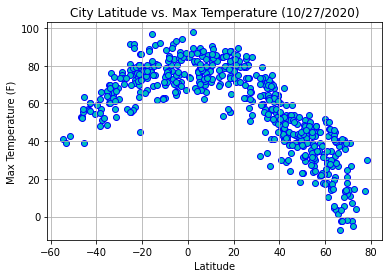

In [16]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude vs. Max Temperature ({analysis_date})",
    "o",
    "c",
    "b"
)


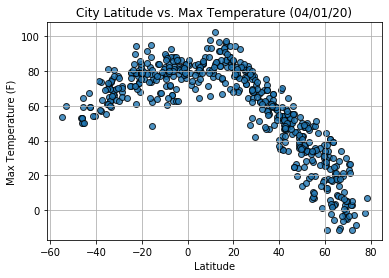

## Latitude vs. Humidity Plot

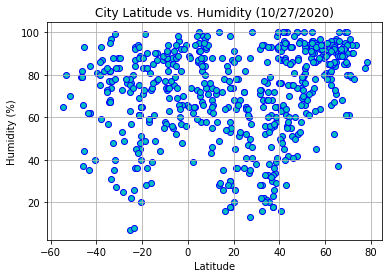

In [17]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude vs. Humidity ({analysis_date})",
    "o",
    "c",
    "b"
)

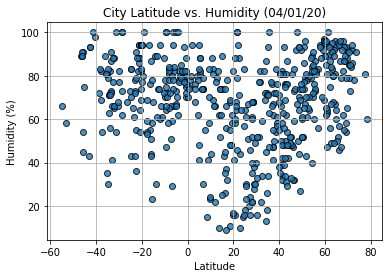

## Latitude vs. Cloudiness Plot

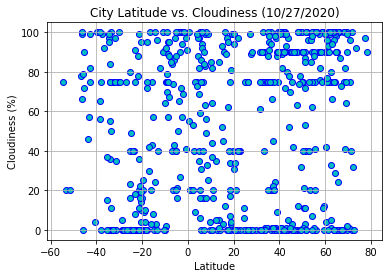

In [18]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude vs. Cloudiness ({analysis_date})",
    "o",
    "c",
    "b"
)

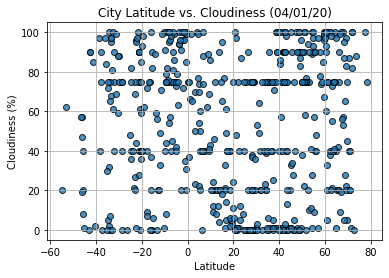

## Latitude vs. Wind Speed Plot

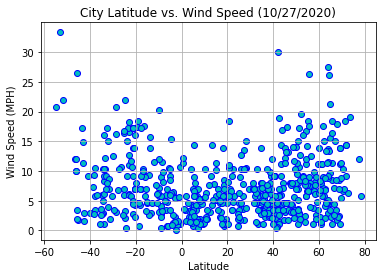

In [19]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude vs. Wind Speed ({analysis_date})",
    "o",
    "c",
    "b"
)

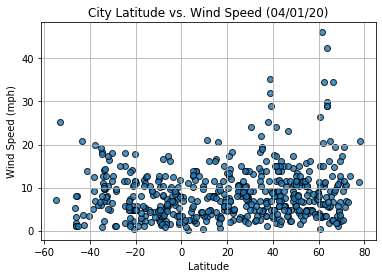

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]

The r-value is: -0.8774874857253497


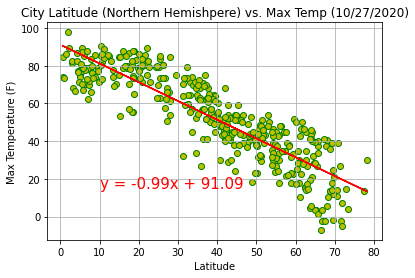

In [21]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (10,15)
)

The r-value is: 0.46937863826630627


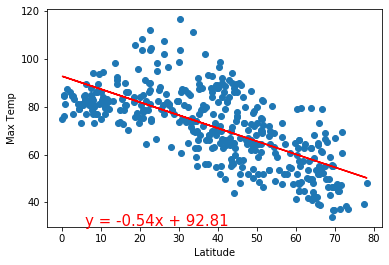

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [22]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]

The r-value is: 0.6817123715008233


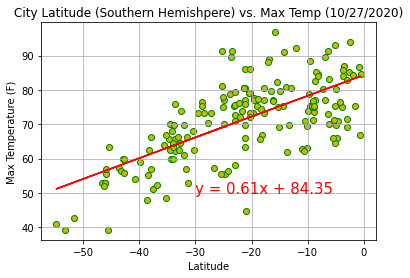

In [23]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-30,50)
)

The r-value is: 0.6082708688906918


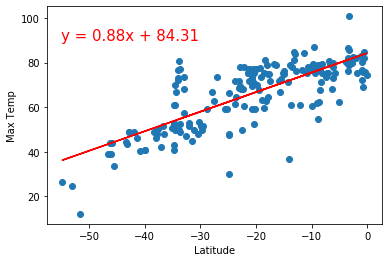

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.29817947716653304


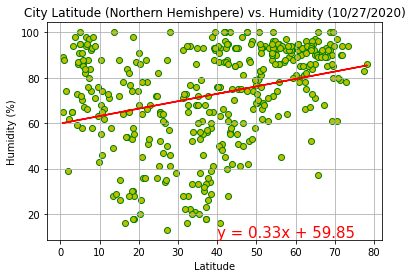

In [24]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.000543987878808455


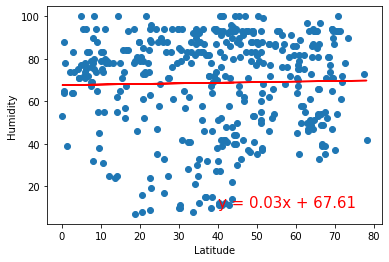

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11354892290236795


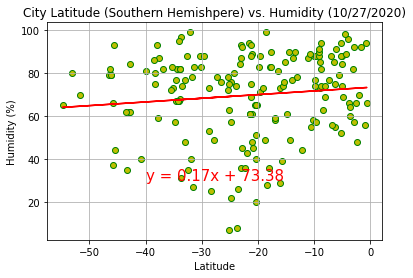

In [25]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,30)
)

The r-value is: 0.014985174297345524


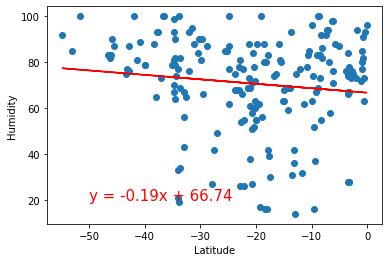

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17586311841548014


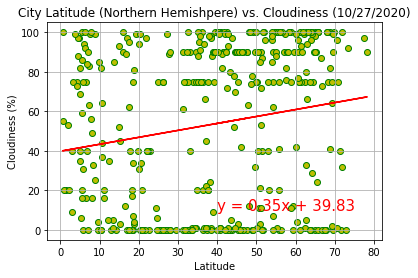

In [26]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.0020898727664228514


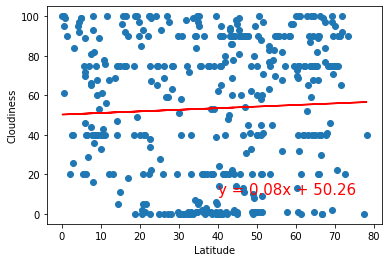

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10000120580770393


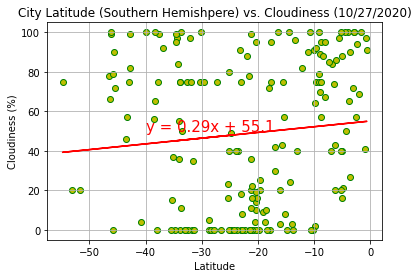

In [27]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,50)
)

The r-value is: 0.0035263772085582894


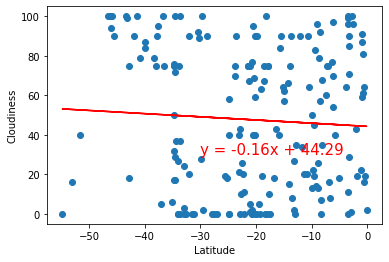

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.32115191720376995


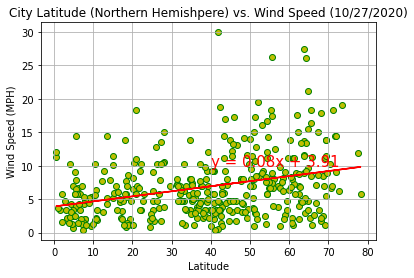

In [28]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.04019723576144484


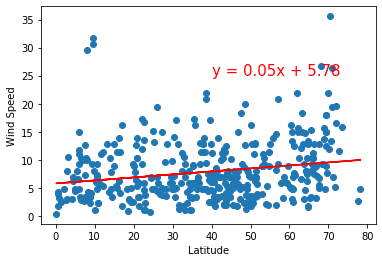

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2863614575037111


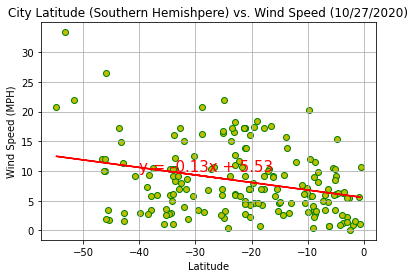

In [29]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,10)
)

The r-value is: 0.017128274759839232


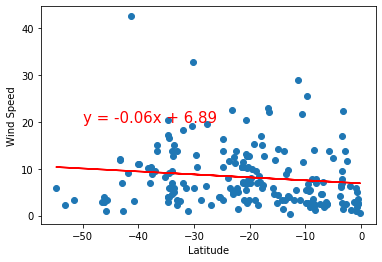